In [1]:
#import all libraries.
import pandas as pd 
import numpy as np
#import Graphical libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import sk learn libraries for Linear regression algo

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#import standarized models
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
# Read the bike sharing data from the .csv file
bike_df1 = pd.read_csv('C:\\Users\\admin\\Documents\\PG-Data-AI-ML-Course\\Bike-Sharing-Use-Case\\day.csv')

In [6]:
bike_df1

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [52]:
# Renaming few columns for better readbility

bike_df1.rename(columns={'yr':'Year','mnth':'Month','hum':'Humidity','cnt':'count'}, inplace=True)

In [53]:
#Get the information about the columns
bike_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   Year        730 non-null    int64  
 2   Month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   Humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  count       730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


In [ ]:
## Cleaning the Data ##

In [54]:
# Drop the columns that are not in used
bike_df1.drop(['instant'],axis=1)
bike_df1.drop(['dteday'],axis=1,inplace=True)

KeyError: "['instant'] not found in axis"

In [55]:
bike_df1

,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,Humidity,windspeed,casual,registered,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [56]:
bike_df1.shape

(730, 14)

In [57]:
bike_df1.weathersit.count()

730

In [58]:
bike_df1.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [59]:
bike_df1.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [60]:
bike_df1.corr()

,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,Humidity,windspeed,casual,registered,count
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584
Year,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
Month,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.059978,0.057427,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
Humidity,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543


<AxesSubplot:ylabel='count'>

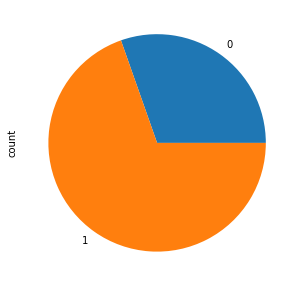

In [61]:
#Bike share by Weekend Vs Week days
plt.figure(figsize=(5,5))
bike_df1.groupby(["workingday"])["count"].sum().plot.pie()

<AxesSubplot:ylabel='count'>

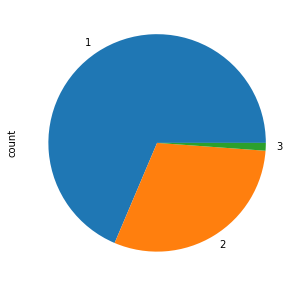

In [62]:
# Bike Sharing different weather conditions
plt.figure(figsize=(5,5))
bike_df1.groupby(["weathersit"])["count"].sum().plot.pie()

<AxesSubplot:xlabel='season'>

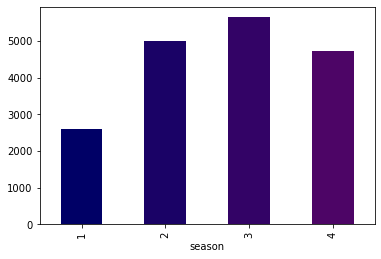

In [63]:
## Bike sharing during different searson
my_colors = [(x/10, x/150.0, 0.4) for x in range(5)]
bike_df1.groupby("season")["count"].mean().plot.bar(color =my_colors)

In [64]:
# Handling Outliner 
bike_df1.columns

Index(['season', 'Year', 'Month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'Humidity', 'windspeed', 'casual',
       'registered', 'count'],
      dtype='object')

<AxesSubplot:xlabel='weekday', ylabel='count'>

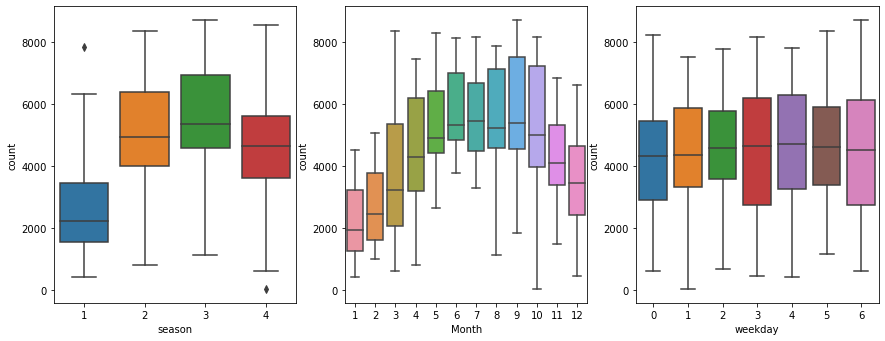

In [65]:
# Analysiz the predict the columns
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'count', data = bike_df1)
plt.subplot(2,4,2)
sns.boxplot(x = 'Month', y = 'count', data = bike_df1)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'count', data = bike_df1)

<Figure size 1080x2160 with 0 Axes>

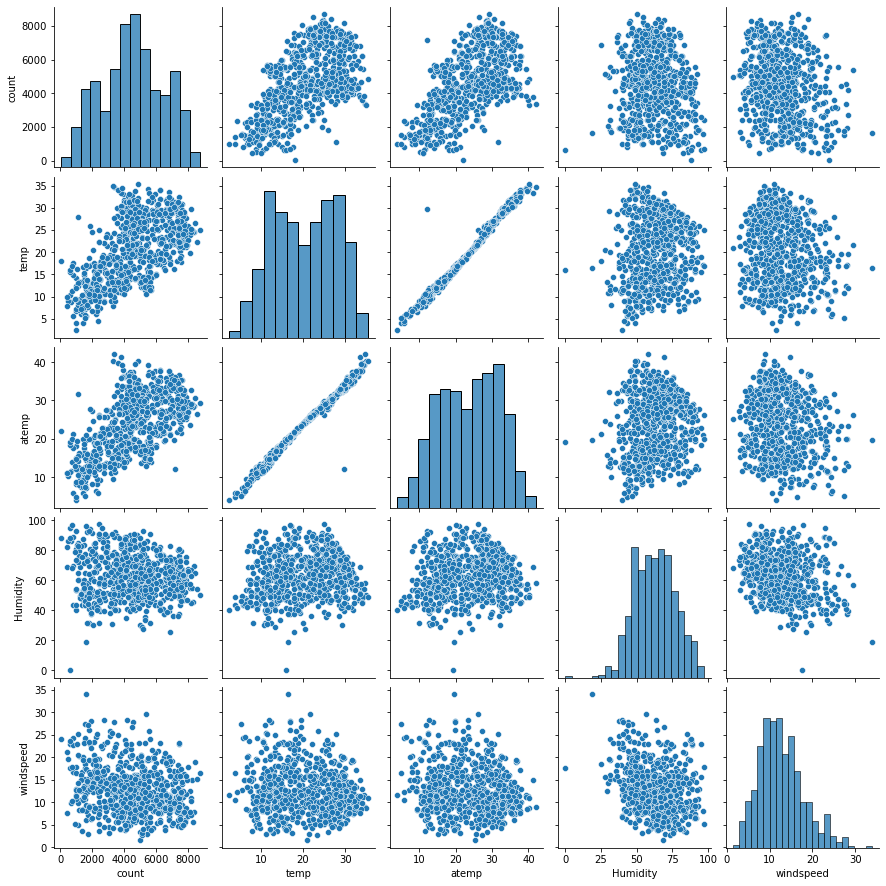

In [68]:
# Draw the pair plot to check the linear regression
plt.figure(figsize = (15,30))
sns.pairplot(data=bike_df1,vars=['count', 'temp', 'atemp', 'Humidity','windspeed'])
plt.show()

In [69]:
## Create Barplot related to categorical columns
def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'count',data=bike_df1)
    plt.subplot(1,2,2)
    sns.barplot(column,'count',data=bike_df1, hue='Year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

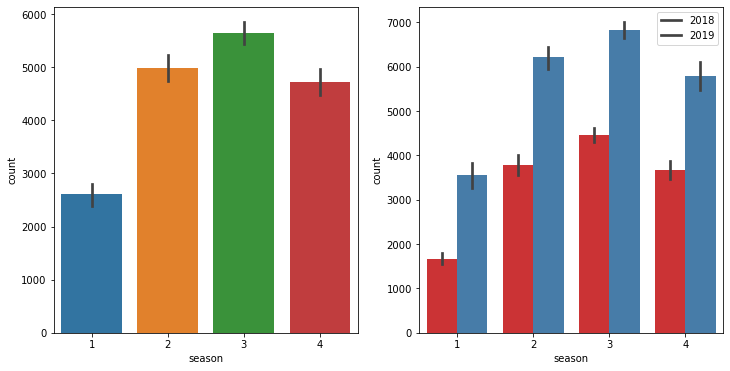

In [70]:
# Plotting visualization for season column
import warnings
warnings.filterwarnings('ignore')
plot_cat_columns('season')

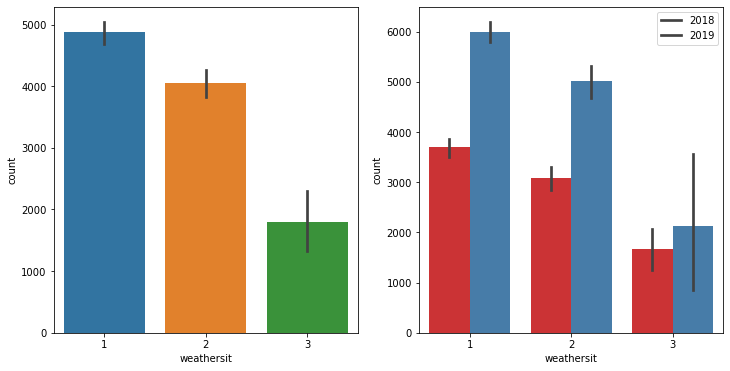

In [71]:
# plotting visualization for weathersit column

plot_cat_columns('weathersit')

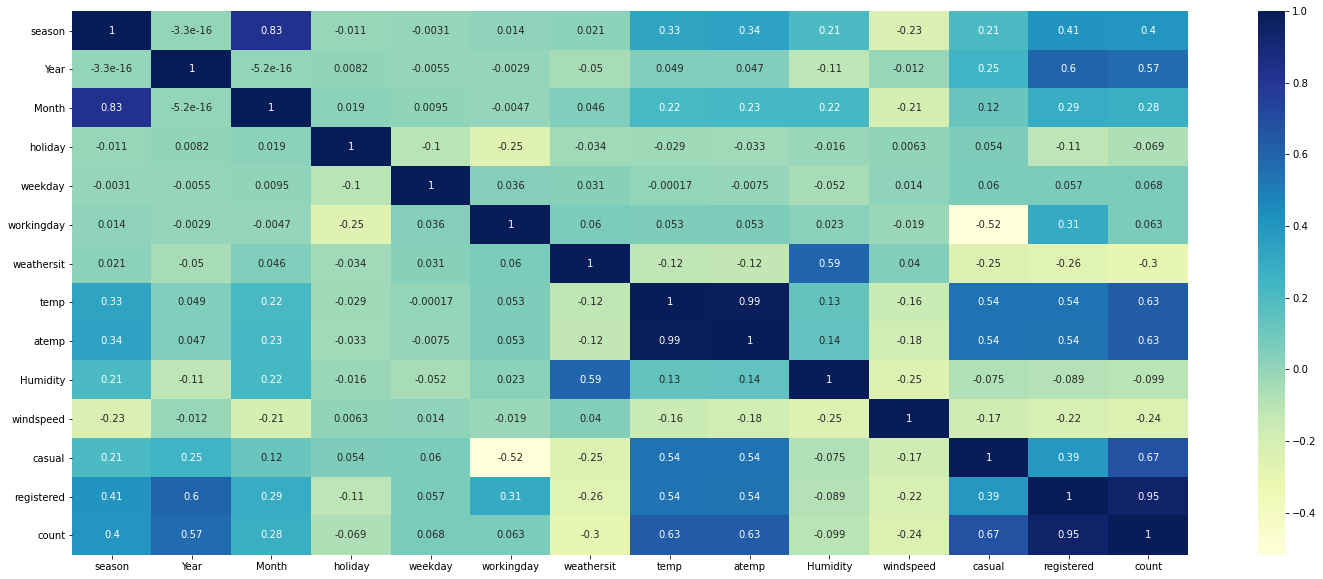

In [72]:
#Calculate Correlation
corr = bike_df1.corr()
plt.figure(figsize=(25,10))

#Draw Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()

In [ ]:
3.Looking at the pair-plot among the numerical variables, which one has the highest correlation with the target variable? 
Answer: By looking at the pair plot TEMP variable has the highest (0.63) correlation with target variable ‘count’ 

In [ ]:
# Building the Linear model

In [74]:
months_df=pd.get_dummies(bike_df1.Month,drop_first=True)
weekdays_df=pd.get_dummies(bike_df1.weekday,drop_first=True)
weathersit_df=pd.get_dummies(bike_df1.weathersit,drop_first=True)
seasons_df=pd.get_dummies(bike_df1.season,drop_first=True)


In [76]:
# Merging  the dataframe, with the dummy variable dataset. 

bike_df_new = pd.concat([bike_df1,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [77]:
bike_df_new

,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,Humidity,...,2,3,4,5,6,2,3,2,3,4
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,1,1,0,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,1,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,1,0,0,0,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,...,0,0,1,0,0,1,0,0,0,0
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,...,0,0,0,1,0,1,0,0,0,0
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,...,0,0,0,0,1,1,0,0,0,0
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,...,0,0,0,0,0,0,0,0,0,0


In [78]:
# dropping unnecessary columns as we have already created dummy variable out of it.

bike_df_new.drop(['season','Month','weekday','weathersit'], axis = 1, inplace = True)

In [ ]:
## Spliting data between training and testing data sets

In [79]:
# splitting the dataframe into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(bike_df_new, train_size = 0.7, random_state = 100)

In [80]:
df_train

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,casual,registered,count,...,2,3,4,5,6,2,3,2,3,4
576,1,0,1,29.246653,33.14480,70.4167,11.083475,968,6248,7216,...,1,0,0,0,0,0,0,0,1,0
426,1,0,0,16.980847,20.67460,62.1250,10.792293,956,3110,4066,...,0,0,0,0,1,1,0,0,0,0
728,1,0,0,10.489153,11.58500,48.3333,23.500518,364,1432,1796,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.87520,48.9583,8.708325,1120,3100,4220,...,0,0,0,0,1,1,0,1,0,0
111,0,0,1,13.803347,16.09770,72.9583,14.707907,177,1506,1683,...,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,30.852500,35.35440,65.9583,8.666718,983,6278,7261,...,0,0,1,0,0,0,0,0,1,0
53,0,0,1,9.091299,12.28585,42.3043,6.305571,139,1778,1917,...,0,1,0,0,0,0,0,0,0,0
350,0,0,0,10.591653,12.46855,56.0833,16.292189,275,2464,2739,...,0,0,0,0,1,1,0,0,0,1
79,0,0,1,17.647835,20.48675,73.7391,19.348461,401,1676,2077,...,0,0,0,0,0,1,0,1,0,0


In [81]:
df_test

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,casual,registered,count,...,2,3,4,5,6,2,3,2,3,4
184,0,1,0,29.793347,33.27085,63.7917,5.459106,3065,2978,6043,...,0,0,0,0,0,1,0,0,1,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,872,5339,6211,...,0,1,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,240,2419,2659,...,0,0,1,0,0,1,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,884,3896,4780,...,0,1,0,0,0,0,0,0,1,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,736,4232,4968,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,19.509153,23.45270,73.3750,11.666643,551,6055,6606,...,1,0,0,0,0,0,0,0,0,1
127,0,0,0,21.661653,25.94665,63.1667,5.000712,1401,2932,4333,...,0,0,0,0,0,0,0,1,0,0
640,1,0,1,26.957500,29.95665,79.3750,4.458569,728,6844,7572,...,0,1,0,0,0,1,0,0,0,1
72,0,0,1,13.333897,16.60000,49.6957,9.174042,359,1687,2046,...,0,0,0,0,0,0,0,0,0,0


In [83]:
# Using MinMaxScaler to Rescaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [84]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','Humidity','windspeed','count']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [85]:
# describing the dataset

df_train.describe()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,casual,registered,count,...,2,3,4,5,6,2,3,2,3,4
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,837.633333,3647.703922,0.513499,...,0.131373,0.158824,0.133333,0.127451,0.154902,0.345098,0.029412,0.247059,0.262745,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,675.936359,1578.410906,0.224421,...,0.338139,0.365870,0.340268,0.333805,0.362166,0.475867,0.169124,0.431725,0.440557,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,20.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,311.000000,2468.250000,0.356420,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,700.000000,3657.000000,0.518638,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,1076.250000,4841.000000,0.684710,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3283.000000,6946.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


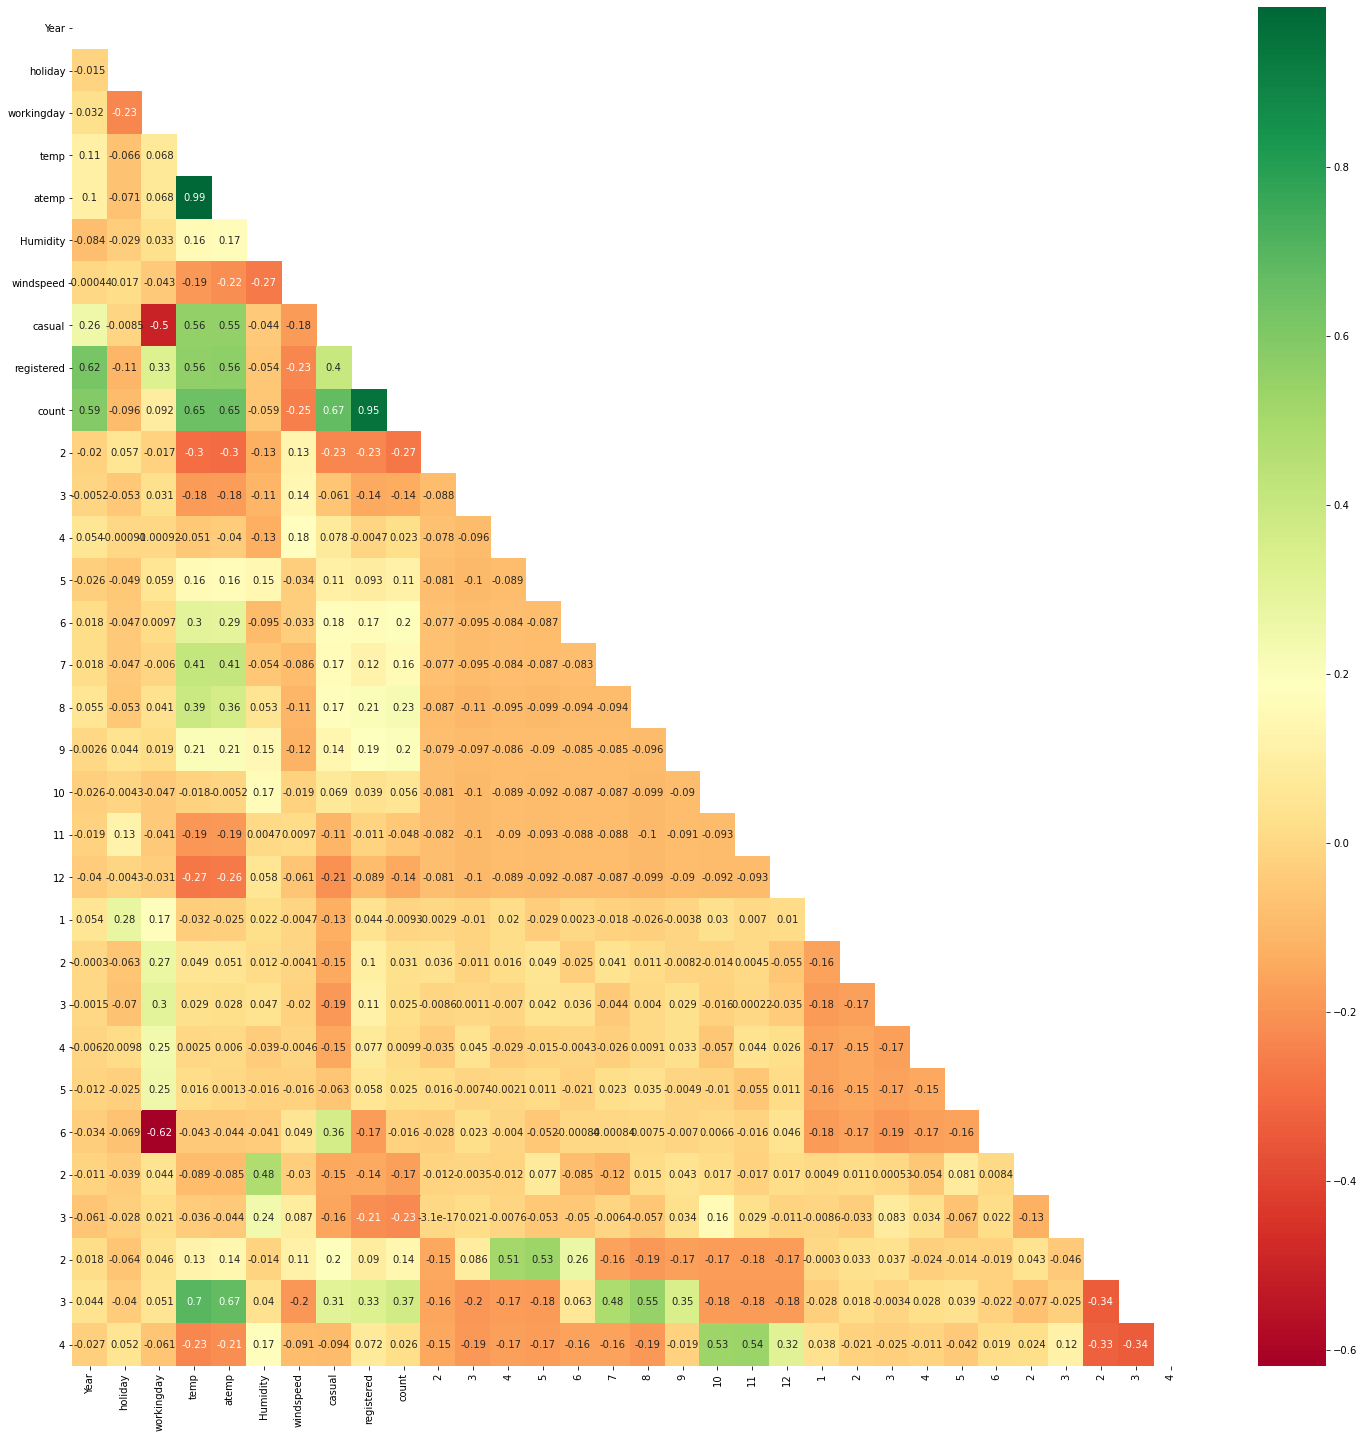

In [86]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

In [ ]:
## Building the Linear Model

In [87]:
# Building the Linear Model

y_train = df_train.pop('count')
X_train = df_train

In [90]:
# Recursive feature elimination 
# import the require Linear regression libraries

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [91]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('holiday', False, 4),
 ('workingday', False, 8),
 ('temp', False, 16),
 ('atemp', True, 1),
 ('Humidity', True, 1),
 ('windspeed', True, 1),
 ('casual', True, 1),
 ('registered', True, 1),
 (2, False, 14),
 (3, True, 1),
 (4, False, 9),
 (5, False, 6),
 (6, False, 11),
 (7, True, 1),
 (8, False, 7),
 (9, True, 1),
 (10, False, 13),
 (11, False, 5),
 (12, False, 17),
 (1, True, 1),
 (2, True, 1),
 (3, True, 1),
 (4, False, 12),
 (5, False, 10),
 (6, False, 15),
 (2, True, 1),
 (3, False, 3),
 (2, True, 1),
 (3, True, 1),
 (4, False, 2)]

In [92]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'temp', 2, 4, 5, 6, 8, 10, 11, 12, 4, 5, 6, 3,
       4],
      dtype='object')

In [93]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [94]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [95]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
16,2,inf
17,3,inf
31,3,inf
30,3,inf
29,3,inf
28,2,inf
27,2,inf
26,2,inf
25,2,inf
24,2,inf


In [97]:
# Building 1st linear regression model

X_train_lm_bike = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_bike).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.206e+29
Date:                Sun, 17 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:45:43   Log-Likelihood:                 16629.
No. Observations:                 510   AIC:                        -3.322e+04
Df Residuals:                     492   BIC:                        -3.315e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0025   5.57e-16  -4.54e+12      0.0

In [99]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['Humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
16,3,inf
17,3,inf
30,3,inf
29,3,inf
28,3,inf
27,2,inf
26,2,inf
25,2,inf
24,2,inf
23,2,inf


In [100]:
# Building 2nd linear regression model

X_train_lm_bike1 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_bike1).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.422e+30
Date:                Sun, 17 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:46:46   Log-Likelihood:                 17093.
No. Observations:                 510   AIC:                        -3.415e+04
Df Residuals:                     493   BIC:                        -3.408e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0025   1.43e-16  -1.78e+13      0.0

In [102]:
y_train_pred = lr_2.predict(X_train_lm_bike1)

Text(0.5, 0, 'Errors')

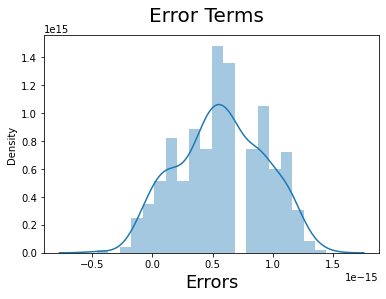

In [103]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

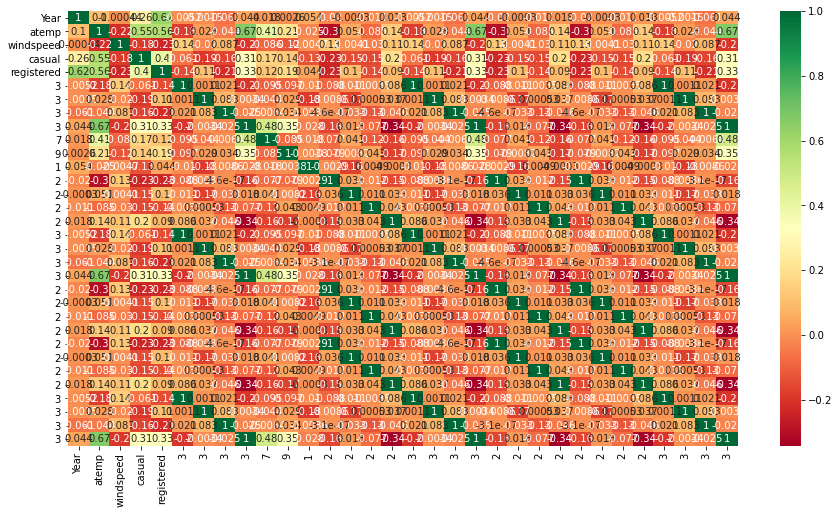

In [104]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()